In [1]:
import pandas as pd

In [2]:
#!pip install scikit-learn==1.0.0
#!pip install statsmodels==0.12.2

In [3]:
from nsepy import get_history as gh
import datetime as dt

In [4]:
stk_data = pd.read_csv("Tatacoffee13_21.csv")
stk_data['Date'] = pd.to_datetime(stk_data['Date'])

# Filter data for the specified date range

start_date = dt.datetime(2021,7,1)
end_date = dt.datetime(2022,1,28)
stk_data = stk_data[(stk_data['Date'] >= start_date) & (stk_data['Date'] <= end_date)]

In [5]:
stk_data

,Date,Open,High,Low,Close
2102,2021-07-01,188.60,189.00,183.00,184.55
2103,2021-07-02,183.05,187.50,182.15,186.40
2104,2021-07-05,187.85,198.35,187.85,192.45
2105,2021-07-06,193.80,194.80,187.35,188.80
2106,2021-07-07,187.80,193.95,185.40,192.85
...,...,...,...,...,...
2220,2021-12-22,202.90,207.80,201.35,205.00
2221,2021-12-23,206.00,206.85,202.05,202.95
2222,2021-12-24,203.90,203.90,199.35,201.00
2223,2021-12-27,200.00,222.00,196.00,218.35


In [6]:
stk_data=stk_data[["Open","High","Low","Close"]]
stk_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 2102 to 2224
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    123 non-null    float64
 1   High    123 non-null    float64
 2   Low     123 non-null    float64
 3   Close   123 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
column="Close"

In [8]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (123, 1)


In [9]:
len(data1)

123

In [10]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

98
X_train length: (98, 1)
X_test length: (25, 1)
y_train length: (98, 1)
y_test length: (25, 1)


In [11]:
import statsmodels
print(statsmodels.__version__)

0.12.2


In [12]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
lags=[1,2,3,4]
from statsmodels.tsa.ar_model import AutoReg
for i in lags:
    #print(i)
   
    for td in trends:
        
        #print(td)
        #trendslist.append(td)
        model = AutoReg(X_train, lags=i,trend=td)
        model_fit = model.fit()
        
        y_pred= model_fit.predict(len(X_train), len(data1)-1)
        from stockFunctions import rmsemape
        print("Lag={},Trend={}".format(i,td))
        rmsemape(y_test,y_pred)
        print("************")

Lag=1,Trend=n
RMSE-Testset: 0.14697833103051713
maPe-Testset: 0.2996233676581957
************
Lag=1,Trend=t
RMSE-Testset: 0.4527171307719543
maPe-Testset: 1.0040447397480157
************
Lag=1,Trend=c
RMSE-Testset: 0.14430244276422075
maPe-Testset: 0.29967659862124923
************
Lag=1,Trend=ct
RMSE-Testset: 0.31746179789405676
maPe-Testset: 0.7089714522623016
************
Lag=2,Trend=n
RMSE-Testset: 0.1475578983263807
maPe-Testset: 0.30117919787413955
************
Lag=2,Trend=t
RMSE-Testset: 0.46227936478853554
maPe-Testset: 1.0271399304412832
************
Lag=2,Trend=c
RMSE-Testset: 0.14264674371339237
maPe-Testset: 0.29649421032977913
************
Lag=2,Trend=ct
RMSE-Testset: 0.3249526756000262
maPe-Testset: 0.7272668466791437
************
Lag=3,Trend=n
RMSE-Testset: 0.17400158804030105
maPe-Testset: 0.36559535727586673
************
Lag=3,Trend=t
RMSE-Testset: 0.4577084130929922
maPe-Testset: 1.0176390425865711
************
Lag=3,Trend=c
RMSE-Testset: 0.1509596370778768
maPe-Testse

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the o

In [13]:
len(y_pred)

25

In [14]:
i=1
td='ct'
model = AutoReg(X_train, lags=i,trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Lag={},Trend={}".format(i,td))
rmsemape(y_test,y_pred)
print("************")

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


Lag=1,Trend=ct
RMSE-Testset: 0.31746179789405676
maPe-Testset: 0.7089714522623016
************


In [15]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

<Figure size 1000x500 with 1 Axes>

In [16]:
len(data1)

123

In [17]:
y_test

array([[0.64510166],
       [0.64695009],
       [0.487061  ],
       [0.3271719 ],
       [0.3909427 ],
       [0.42144177],
       [0.43715342],
       [0.41866913],
       [0.3844732 ],
       [0.56746765],
       [0.58780037],
       [0.57486137],
       [0.64232902],
       [0.6090573 ],
       [0.57763401],
       [0.54343808],
       [0.48243993],
       [0.4168207 ],
       [0.23752311],
       [0.33179298],
       [0.43068392],
       [0.39279113],
       [0.35674677],
       [0.67744917],
       [0.56654344]])

In [18]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [19]:
aTestNormTable

,Close
0,0.645102
1,0.64695
2,0.487061
3,0.327172
4,0.390943
5,0.421442
6,0.437153
7,0.418669
8,0.384473
9,0.567468


In [20]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_ori

array([[216.6 ],
       [216.7 ],
       [208.05],
       [199.4 ],
       [202.85],
       [204.5 ],
       [205.35],
       [204.35],
       [202.5 ],
       [212.4 ],
       [213.5 ],
       [212.8 ],
       [216.45],
       [214.65],
       [212.95],
       [211.1 ],
       [207.8 ],
       [204.25],
       [194.55],
       [199.65],
       [205.  ],
       [202.95],
       [201.  ],
       [218.35],
       [212.35]])

In [21]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])
actual_stock_price_test_oriA

,Close
0,216.6
1,216.7
2,208.05
3,199.4
4,202.85
5,204.5
6,205.35
7,204.35
8,202.5
9,212.4


In [22]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [23]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

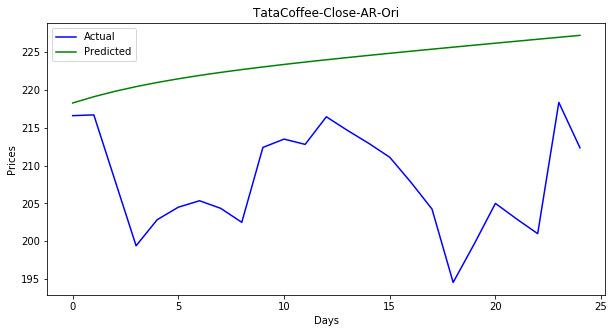

In [24]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-AR-Ori","Days","Prices")

In [25]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 17.17468326606848
maPe-Testset: 0.07612161180375887


In [26]:
forecast=model_fit.predict(len(data1), len(data1)+3)
forecast

array([0.84606549, 0.85079937, 0.85552548, 0.86024539])

In [27]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [28]:
forecast_stock_price_test_oriF

,Closefore
0,227.472143
1,227.728246
2,227.983929
3,228.239276


In [29]:
forecast_stock_price_test_oriF.to_csv("CloseAR.csv",index=False)

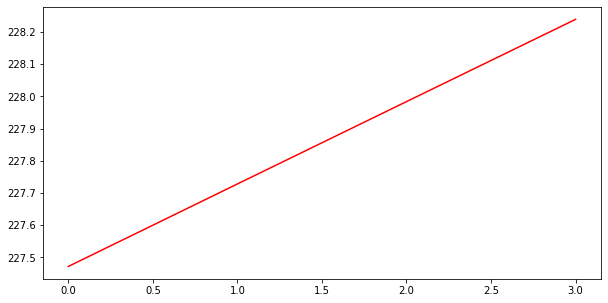

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")